In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import ttest_ind, ttest_rel
from pathlib import Path

# "Recreating" some of the plots from Rousselet et al (2016) ish
A variety of plots that can be used for inspiration for your own projects. 

In [3]:
# picks of channels and timewindow
picks = ["O1", "Oz", "O2"]

# time window in seconds
tmin, tmax = 0.1, 0.2

# load in the data
all_epochs = []

data_path = Path("/Users/au661930/work/EEG_lab/example_data")

for participant in ["Group1", "Group5", "Group6"]:
    epochs = mne.read_epochs(data_path / f"{participant}-epo.fif", verbose=False, preload=True)

    # only keep eeg channels
    epochs.pick(["eeg"])

    all_epochs.append(epochs)


print(type(all_epochs)) # we have now created a list of epochs objects
print(len(all_epochs)) # we have 3 epochs objects in the list
print(type(all_epochs[0])) # we can access the first epochs object in the list which is a Epochs object


# PAIRED T-TEST
# create empty arrays to store the data 
word = np.array([])
image = np.array([])

for epochs in all_epochs: # loop over the list with epochs for each participant

    # extract the trials you are interested in
    epochs1 = epochs["Word"]
    epochs2 = epochs["Image"]

    # extract the data for the time window and channels of interest
    data1= epochs1.get_data(picks = picks, tmin = tmin, tmax = tmax)
    data2 = epochs2.get_data(picks = picks, tmin = tmin, tmax = tmax)

    # calculate the mean over the time, channel and trial dimension (axis 0, 1 and 2)
    data1_mean = np.mean(data1, axis=(0, 1, 2))
    data2_mean = np.mean(data2, axis=(0, 1, 2))

    # append the data to the arrays
    word = np.append(word, data1_mean)
    image = np.append(image, data2_mean)

print(word)
print(image)

# now using paired t-test
ttest_rel(word, image)


<class 'list'>
3
<class 'mne.epochs.EpochsFIF'>
[-7.08230864e-06 -4.33707991e-06 -2.76342117e-06]
[-6.65635744e-06 -4.72180027e-06 -5.17024915e-06]


TtestResult(statistic=np.float64(0.9361547827207205), pvalue=np.float64(0.4480190442834888), df=np.int64(2))

Extracting data from the entire time window for each trial for each participant and condition to get you started:

In [4]:
# create empty arrays to store the data 
word_plot = []
image_plot = []

for epochs in all_epochs: # loop over the list with epochs for each participant

    # extract the trials you are interested in
    epochs1 = epochs["Word"]
    epochs2 = epochs["Image"]

    # extract the data for the time window and channels of interest
    data1= epochs1.get_data(picks = picks)
    data2 = epochs2.get_data(picks = picks)

    # append the data to the arrays
    word_plot.append(data1)
    image_plot.append(data2)


# we now have a list of arrays with the data for each participant
print(type(word_plot)) # we have now created a list of arrays
print(len(word_plot)) # we have 3 array objects in the list
print(type(word_plot[0])) # we can access the first array object in the list which is a numpy array
print(word_plot[0].shape) # the shape of the array is (number of trials, number of channels, number of time points)

<class 'list'>
3
<class 'numpy.ndarray'>
(60, 3, 175)


In [5]:
# preparing data for plotting
plotting_data_img = {}
plotting_data_word = {}

participants = ["Group1", "Group5", "Group6"]

for participant, epochs in zip(participants, all_epochs):
    data_img = epochs["Image"].get_data(picks = picks)
    data_word = epochs["Word"].get_data(picks = picks)

    plotting_data_img[participant] = np.mean(data_img, axis=1)
    plotting_data_word[participant] = np.mean(data_word, axis=1)

In [6]:
times = epochs.times

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
<>:101: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
<>:101: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4z/m7s435qs4bg13rtf3k29jn6s1p_fmr/T/ipykernel_88470/3137189412.py:32: SyntaxWarning: invalid escape sequence '\p'
  axes[0, 1].fill_between(times, avg_group_lvl_img - std_group_lvl_img, avg_group_lvl_img + std_group_lvl_img, color = "forestgreen", alpha = 0.2, label = "Image $\pm$ 1 SD")
/var/folders/4z/m7s435qs4bg13rtf3k29jn6s1p_fmr/T/ipykernel_88470/3137189412.py:33: SyntaxWarning: invalid escape sequence '\p'
  axes[0, 1].fill_between(times, avg_group_lvl_word - std_group_lvl_word, avg_group_lvl_word + std_group_lvl_word, color = "darkorange", alpha = 0.2, label = "Wo

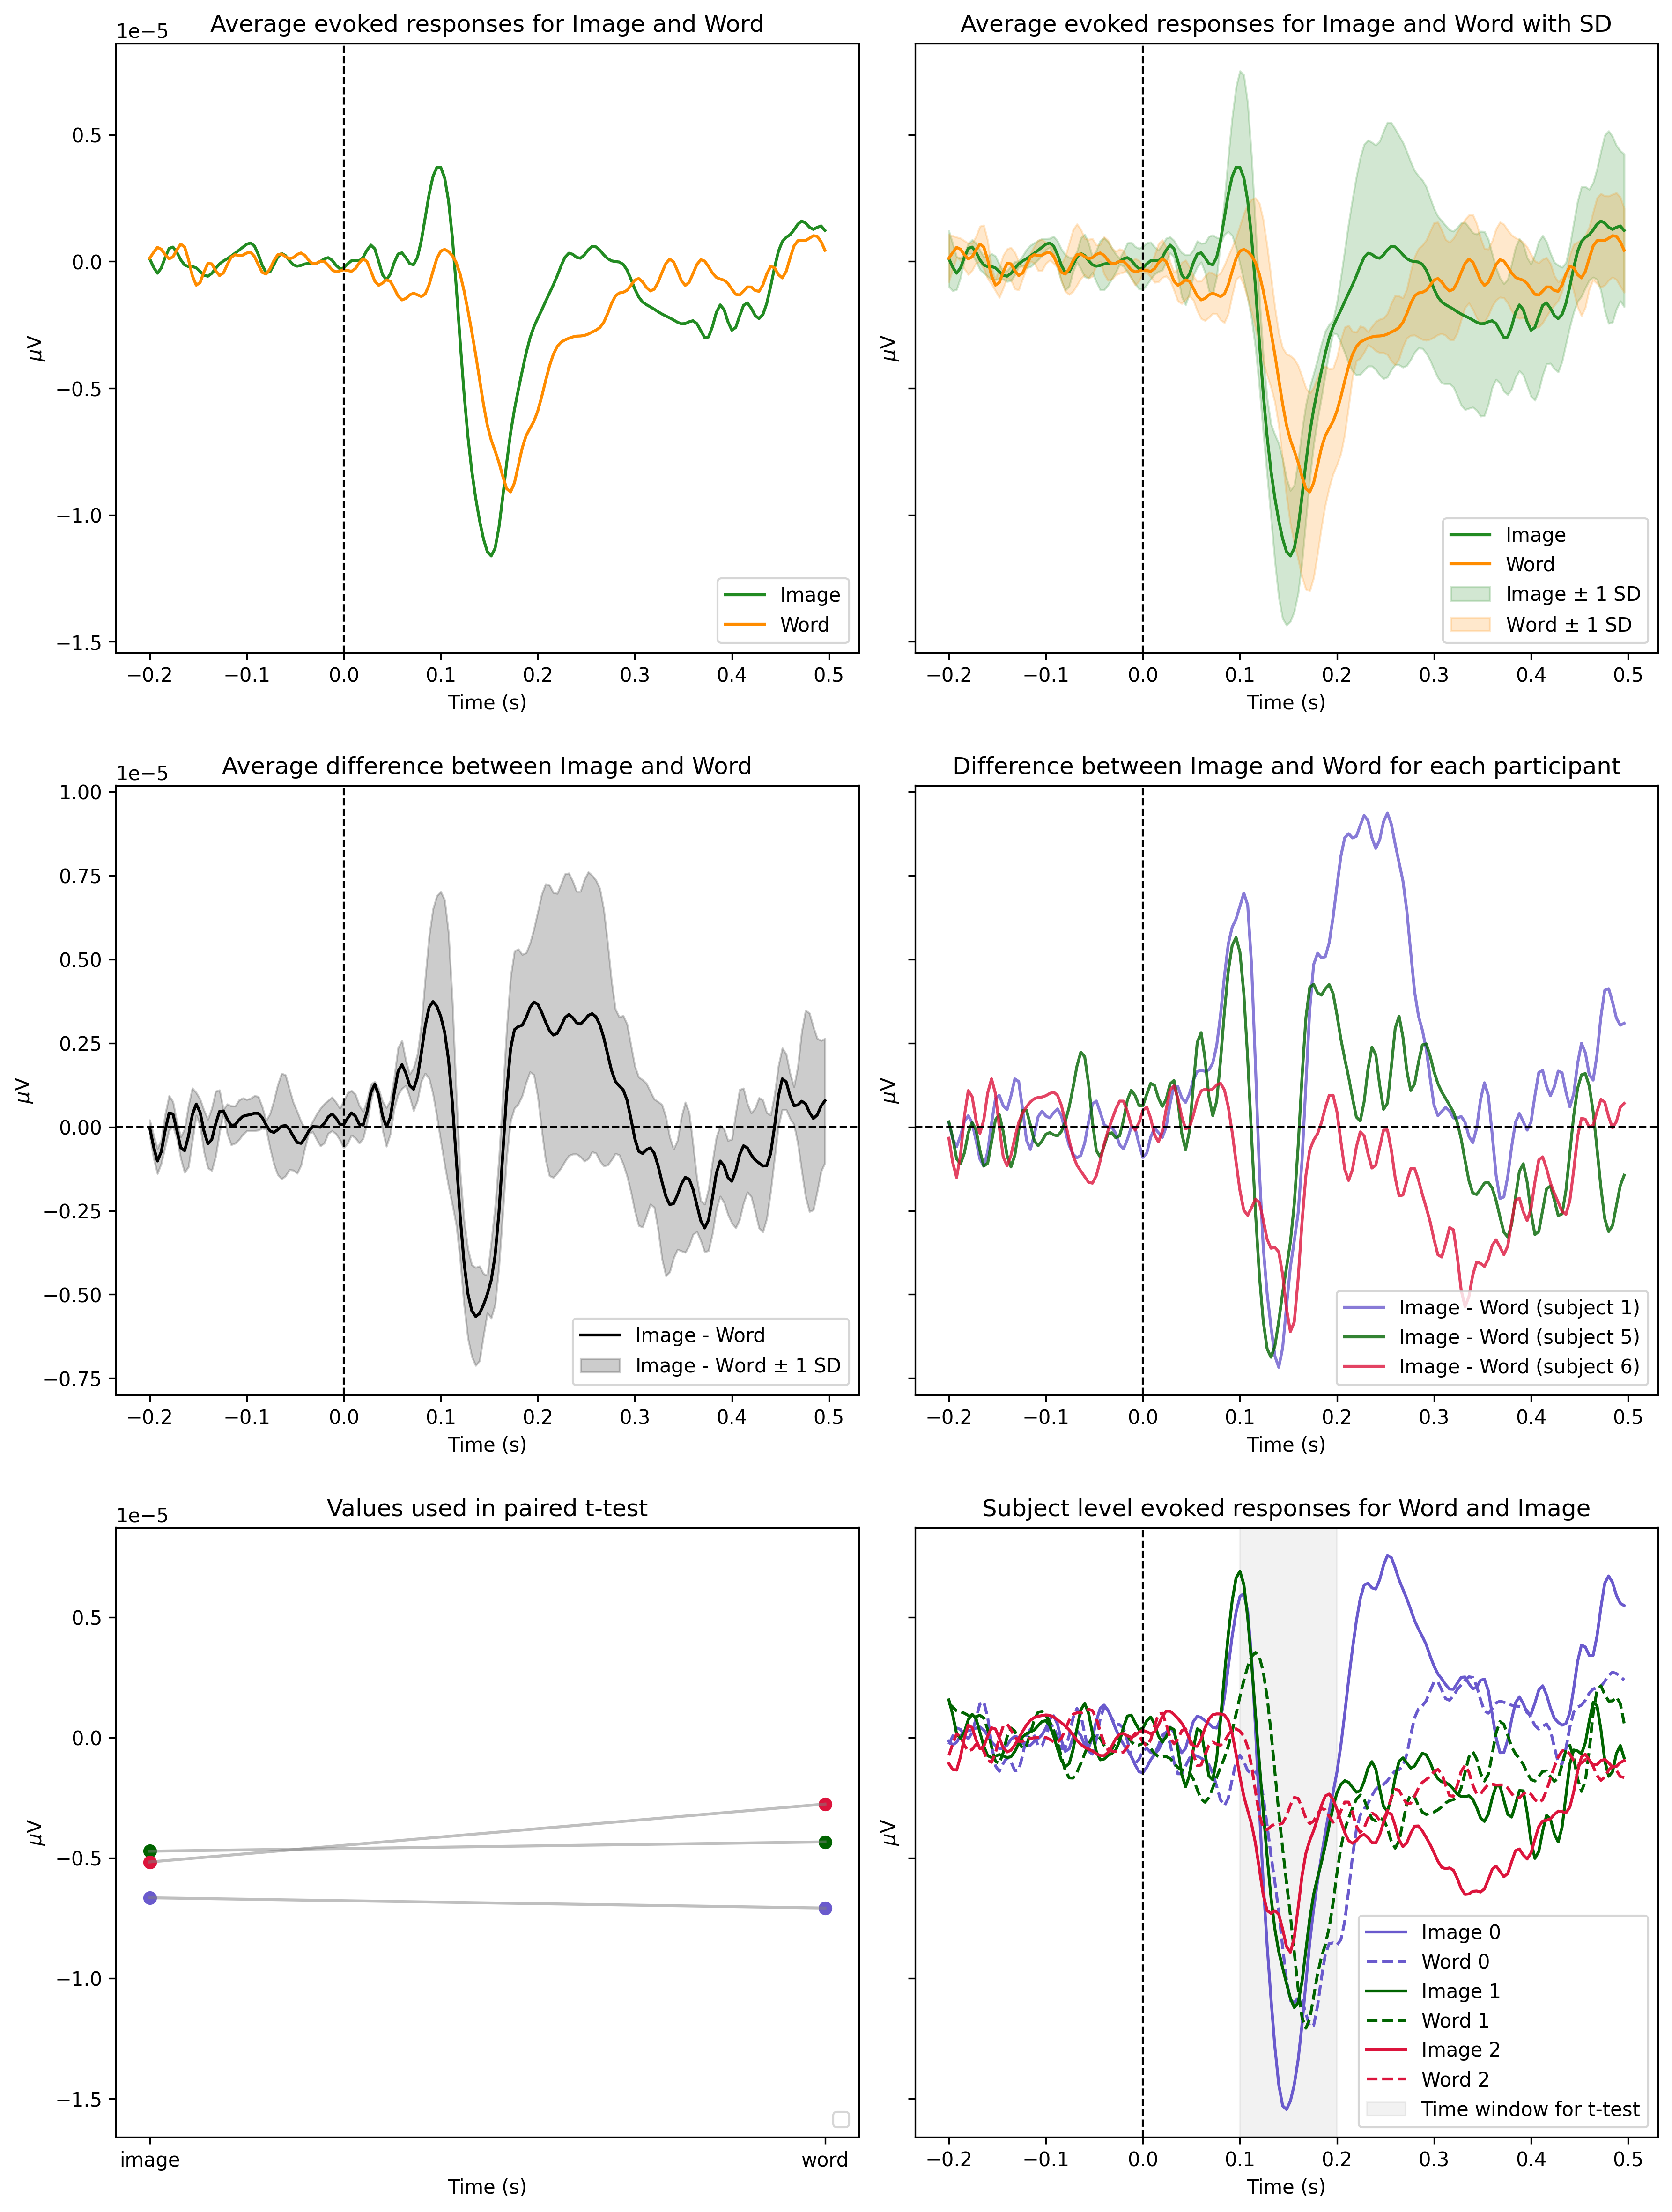

In [7]:
n_rows, n_cols = 3, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 16), dpi=300, sharey="row")
 
### FIRST PLOT ###
# average over participants
# stack average for each particpant so shape =  (participants, timepoints )
group_lvl_img = np.stack([plotting_data_img[participant].mean(axis = 0) for participant in participants])
group_lvl_word = np.stack([plotting_data_word[participant].mean(axis = 0) for participant in participants])

# average over participants
avg_group_lvl_img = group_lvl_img.mean(axis=0)
avg_group_lvl_word = group_lvl_word.mean(axis=0)

axes[0, 0].plot(times, avg_group_lvl_img, color = "forestgreen", label = "Image")
axes[0, 0].plot(times, avg_group_lvl_word, color = "darkorange", label = "Word")

axes[0, 0].set_title("Average evoked responses for Image and Word")



### SECOND PLOT ###
# including some kind of measure of variance

# standard deviation (maybe not the best measure since we only have 3 participants)
# Note: here i am calculating the standard deviation over the average for each participant
std_group_lvl_img = group_lvl_img.std(axis=0)
std_group_lvl_word = group_lvl_word.std(axis=0)

axes[0, 1].plot(times, avg_group_lvl_img, color = "forestgreen", label = "Image")
axes[0, 1].plot(times, avg_group_lvl_word, color = "darkorange", label = "Word")

axes[0, 1].fill_between(times, avg_group_lvl_img - std_group_lvl_img, avg_group_lvl_img + std_group_lvl_img, color = "forestgreen", alpha = 0.2, label = "Image $\pm$ 1 SD")
axes[0, 1].fill_between(times, avg_group_lvl_word - std_group_lvl_word, avg_group_lvl_word + std_group_lvl_word, color = "darkorange", alpha = 0.2, label = "Word $\pm$ 1 SD")

axes[0, 1].set_title("Average evoked responses for Image and Word with SD")


### THIRD PLOT ###
# plotting the differnence between the conditions (average)
# calculate the difference between the conditions
difference = group_lvl_img - group_lvl_word

# average over participants
avg_diff = difference.mean(axis=0)

# standard deviation
std_diff = difference.std(axis=0)

axes[1, 0].plot(times, avg_diff, color = "black", label = "Image - Word")
axes[1, 0].fill_between(times, avg_diff - std_diff, avg_diff + std_diff, color = "black", alpha = 0.2, label = "Image - Word $\pm$ 1 SD")

# line at no difference
axes[1, 0].axhline(0, color='k', linestyle='--', linewidth=1)

axes[1, 0].set_title("Average difference between Image and Word")


### FOURTH PLOT ###
# difference between the conditions for each participant

colours = ["slateblue", "darkgreen", "crimson"]

for col, diff_subject, participant in zip(colours, difference, participants):
    axes[1, 1].plot(times, diff_subject, color = col, alpha = 0.8, label = f"Image - Word (subject {participant[-1]})")

# line at no difference
axes[1, 1].axhline(0, color='k', linestyle='--', linewidth=1)

axes[1, 1].set_title("Difference between Image and Word for each participant")


### FIFTH PLOT ###
# plotting the values used in the paired t-test (word image)
for i, (w, img) in enumerate(zip(word, image)):
    axes[2, 0].scatter(["image"], img, color = colours[i])
    axes[2, 0].scatter(["word"], w, color = colours[i])

    # draw lines between each pair of observations
    axes[2, 0].plot(["image", "word"], [image[i], word[i],], color = "grey", alpha = 0.5)

axes[2, 0].set_title("Values used in paired t-test")

### SIXTH PLOT ###
# subject level evoked responses for image and word
for i, (img, word) in enumerate(zip(plotting_data_img.values(), plotting_data_word.values())):
    img = img.mean(axis=0)
    word = word.mean(axis=0)
    
    axes[2, 1].plot(times, img, color = colours[i], label = f"Image {i}")
    axes[2, 1].plot(times, word, color = colours[i], label = f"Word {i}", linestyle = "--")


axes[2, 1].axvspan(tmin, tmax, alpha=0.1, color='grey', label = "Time window for t-test")

axes[2, 1].set_title("Subject level evoked responses for Word and Image")


# adding some jazz to all the axes (labels, line at 0)
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('$\mu$V')

    ax.legend(loc = "lower right")

    if i != 4:
        ax.axvline(0, color='k', linestyle='--', linewidth=1)

plt.tight_layout()

# Example of how to "hack" MNE plot
If you want to add some custom or additional information to the MNE plots you can use matplotlib. Here is an example of using a MNE plotting function and adding a few customizations. 

combining channels using "mean"
combining channels using "mean"


Text(0.5, 1.0, 'Average evoked responses for Word and Image for particpant 1')

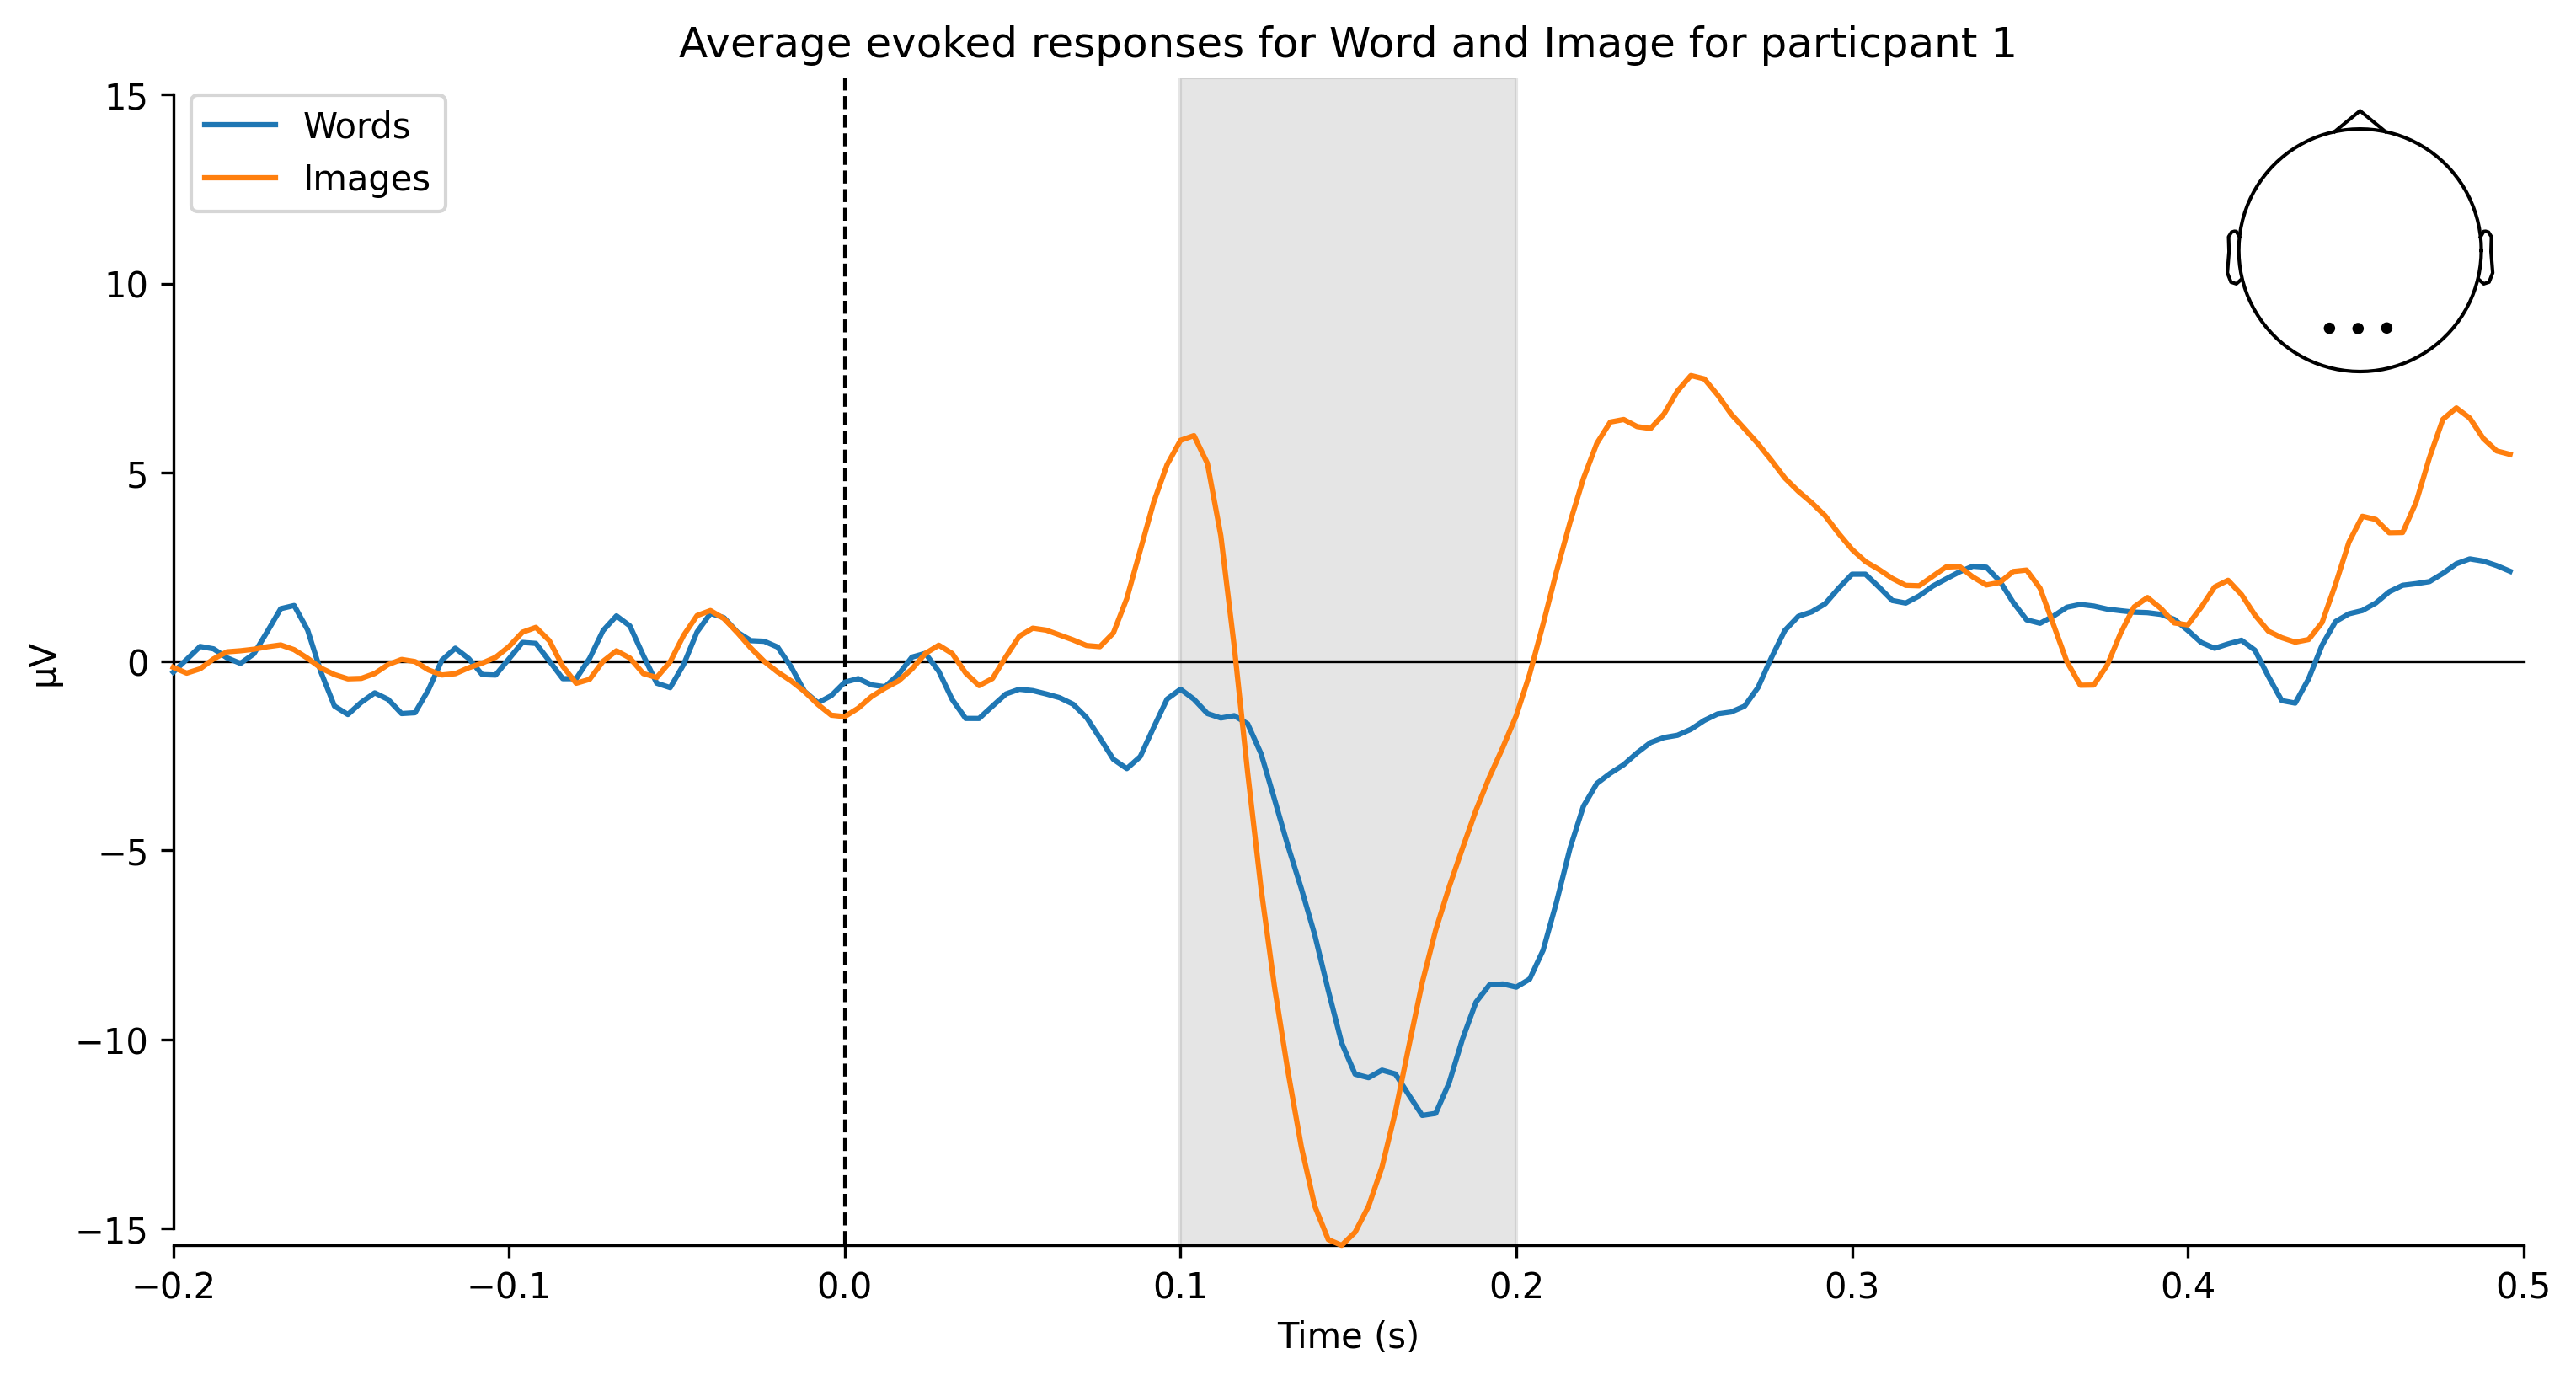

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6), dpi = 300)

epochs_word = all_epochs[0]["Word"]
epochs_image = all_epochs[0]["Image"]

mne.viz.plot_compare_evokeds(
    {"Words": epochs_word.average(picks = picks), "Images": epochs_image.average(picks = picks)},
    axes = ax, # specify the axis to plot the MNE plot onto
    combine = "mean",
    show_sensors = True, # show the sensor layout
    show = False # do not show the plot
    ) 


# adding a vertical span for the time window
ax.axvspan(tmin, tmax, color="grey", alpha=0.2)

# adding a title
ax.set_title("Average evoked responses for Word and Image for particpant 1")




# fMRI example
In this example I will show how to plot both first-level and second-level fMRI results using nilearn and matplotlib.

Code for loading data and running first and second level models are from the `06_fMRI_analysis` notebook. 

The data contains "10 subjects who were scanned with fMRI during a “language localizer” where they (covertly) read meaningful sentences (trial_type=’language’) or strings of consonants (trial_type=’string’), presented one word at a time at the center of the screen (rapid serial visual presentation)." - [Nilearn documentation](https://nilearn.github.io/dev/modules/description/language_localizer_demo.html)

In [9]:
from nilearn.datasets import fetch_language_localizer_demo_dataset
from nilearn.glm.first_level import first_level_from_bids

data_dir, _ = fetch_language_localizer_demo_dataset()


task_label = 'languagelocalizer'
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label,
        img_filters=[('desc', 'preproc')])

/tmp/ipykernel_2659/2683956678.py:4: DeprecationWarning: From version 0.13.0 this fetcherwill always return a Bunch.
Use `legacy_output=False` to start switch to this new behavior.
  data_dir, _ = fetch_language_localizer_demo_dataset()
/home/ucloud/.local/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1374: UserWarning: 'StartTime' not found in file /home/ucloud/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.json.
  StartTime = infer_slice_timing_start_time_from_dataset(


In [10]:
# fitting first level models
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
zmaps_first_level = []
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM, recall that the model variable is a FirstLevelModel object
    model.fit(imgs, events, confounds)
    # compute the contrast of interest and make a map of z-values
    zmap = model.compute_contrast('language-string')
    zmaps_first_level.append(zmap)

In [11]:
# preparing second level model
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

# we will simply add the zmaps from the first level as input to the second level model
second_level_input = zmaps_first_level

# create intercept design matrix
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=['intercept'],
)


# adding the smoothing parameter and fitting the model 
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input, design_matrix=design_matrix)

# computing the second level contrast
zmap_second_level = second_level_model.compute_contrast()

## Create plot(s)

In [12]:
# setting a significance threshold
from scipy.stats import norm
p001_unc = norm.isf(0.001)

In [13]:
# you can rely on the nilearn plotting functions to plot the results or another plotting library if you prefer
# have a look in notebooks from lab for inspiration!
import nilearn.plotting as plotting

Text(0.5, 0.98, 'First level contrasts (four representative subjects) and the second level contrast')

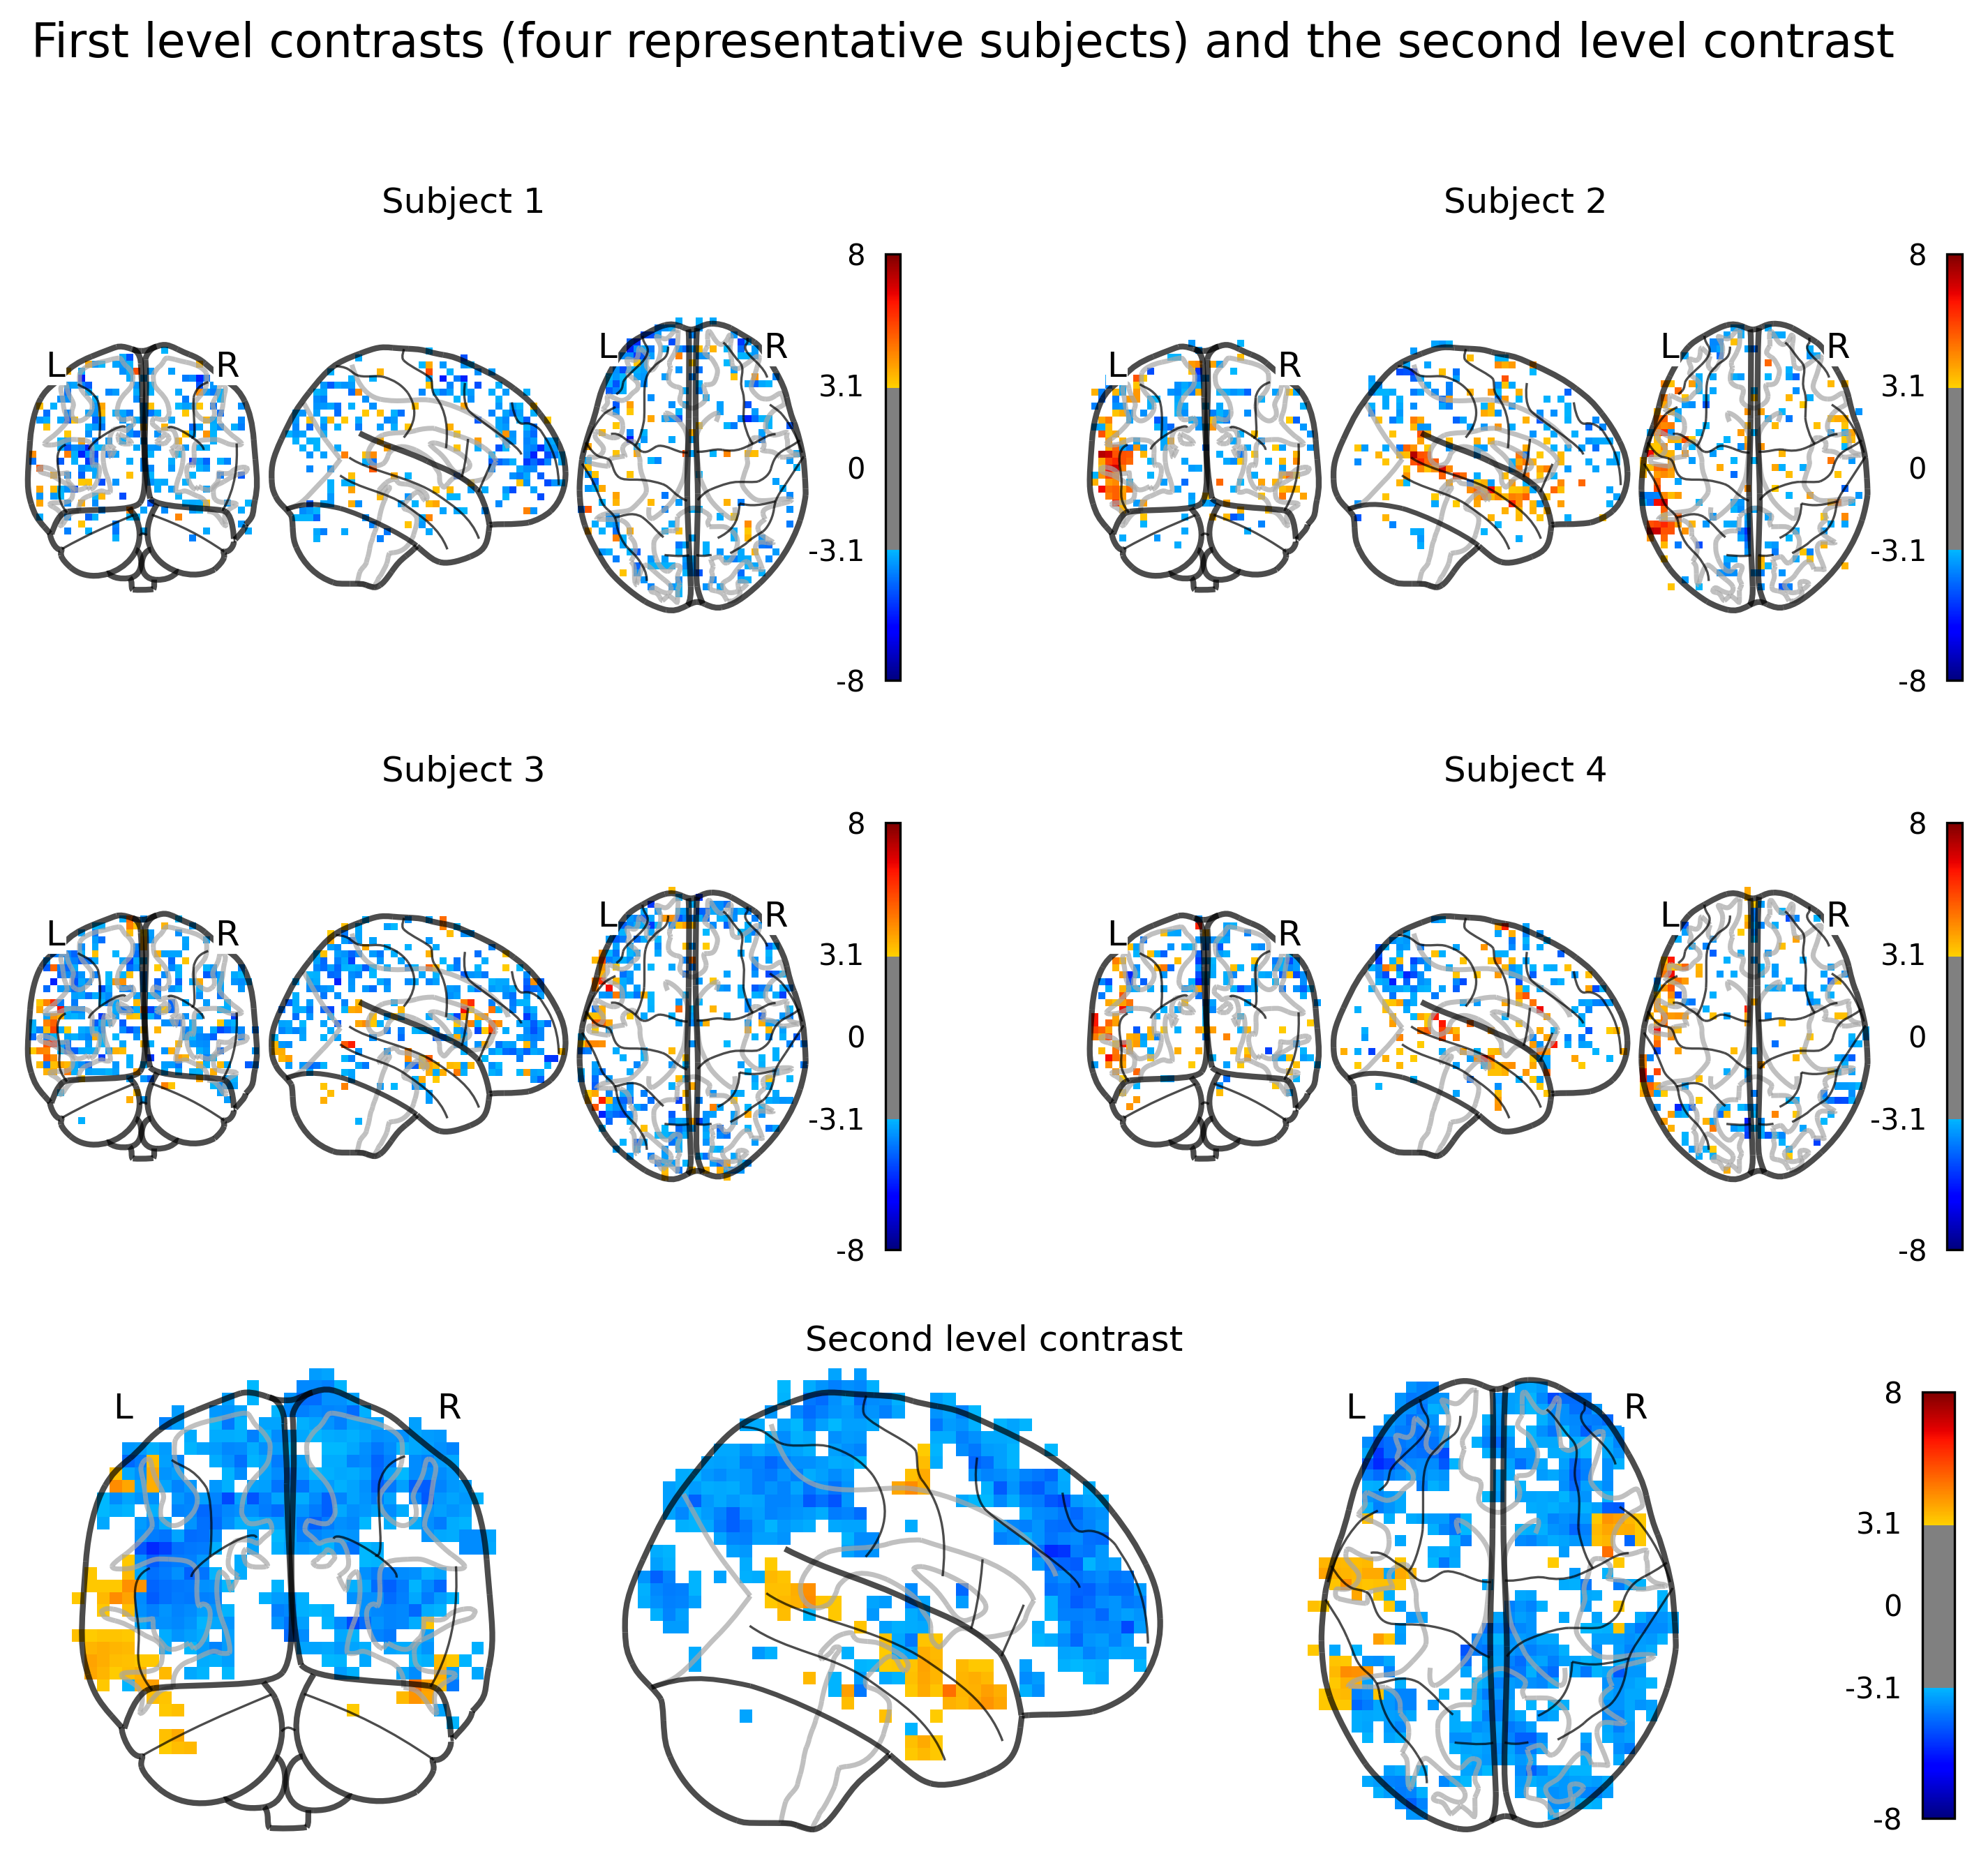

In [19]:
# PLOTTING THE FIRST LEVEL CONTRASTS FOR THE FIRST FOUR SUBJECTS
fig, axes = plt.subplots(3, 2, figsize=(12, 10), dpi=300)

for i, (zmap, ax) in enumerate(zip(zmaps_first_level, axes.flatten()[:4])):
    plotting.plot_glass_brain(
        zmap, colorbar=True, 
        axes=ax, display_mode="ortho", 
        cmap = "jet",
        plot_abs = False,
        vmin = -8, vmax = 8,
        threshold = p001_unc)

    ax.set_title(f"Subject {i+1}")
    

# combine the last axes for the second level contrast
gs = axes.flatten()[-2].get_gridspec()
for ax in axes.flatten()[-2:]:
    ax.remove()

axbig = fig.add_subplot(gs[-1, :])


# plot the second level contrast
plotting.plot_glass_brain(
    zmap_second_level, colorbar=True, 
    axes=axbig, display_mode="ortho", 
    cmap = "jet",
    plot_abs = False,
    vmin = -8, vmax = 8,
    threshold = p001_unc)

axbig.set_title("Second level contrast")


fig.suptitle("First level contrasts (four representative subjects) and the second level contrast", fontsize=16)
    